In [22]:
#@title Import libraries {display-mode: "form"}

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [24]:
#DATA EXPLORATION

In [25]:
final_img_list = pd.read_csv('/Users/user/Desktop/Post_image/posts_image/FINAL_img_list.csv')

In [26]:
def tagged(table):
  if table['tagged_acc']=="yes":
    return 1
  else:
    return 0

final_img_list['tagged_acc'] = final_img_list.apply(lambda final_img_list:tagged(final_img_list),axis = 1)

In [27]:
def aesthetic(table):
    if table['aesthetic']=="high_quality":
        return 2
    elif table['aesthetic']=="medium_quality":
        return 1
    else:
        return 0
final_img_list['aesthetic'] = final_img_list.apply(lambda final_img_list:aesthetic(final_img_list),axis = 1)

In [28]:
def sponsored(table):
    if table['sponsored']=="no":
        return 0
    else:
        return 1
final_img_list['sponsored'] = final_img_list.apply(lambda final_img_list:sponsored(final_img_list),axis = 1)

In [29]:
category = pd.get_dummies(final_img_list['Category'], prefix = 'Category')
category

,Category_beauty,Category_family,Category_fashion,Category_fitness,Category_food,Category_interior,Category_other,Category_pet,Category_travel
0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1072,0,0,0,0,0,0,0,0,1
1073,0,0,1,0,0,0,0,0,0
1074,0,0,0,0,0,0,0,0,1
1075,0,0,0,0,0,1,0,0,0


In [30]:
final_img = pd.concat([category,final_img_list],axis = 1)

In [31]:
final_img

,Category_beauty,Category_family,Category_fashion,Category_fitness,Category_food,Category_interior,Category_other,Category_pet,Category_travel,Unnamed: 0,...,Username,Category,#Followers,#Followees,#Posts,nr_engagement,engagement_ratio,influencer_type,popularity,weekday
0,0,1,0,0,0,0,0,0,0,0,...,taramoon,family,24954.0,5639.0,2091.0,1801,7.217280,regular_influencer,1,1
1,0,0,0,0,0,0,1,0,0,1,...,misschessknight,other,1218.0,420.0,485.0,21,1.724138,nano_influencer,0,6
2,0,0,1,0,0,0,0,0,0,2,...,viktoriahutter,fashion,186649.0,180.0,585.0,11558,6.192372,mid_influencer,1,3
3,1,0,0,0,0,0,0,0,0,3,...,marchbeautyword,beauty,37128.0,747.0,3062.0,824,2.219349,regular_influencer,0,1
4,0,0,0,0,1,0,0,0,0,4,...,thevegansix,food,42911.0,537.0,777.0,768,1.789751,regular_influencer,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,0,0,0,0,0,0,0,0,1,1072,...,s_marga,travel,110401.0,953.0,987.0,2334,2.114111,mid_influencer,1,3
1073,0,0,1,0,0,0,0,0,0,1073,...,g.gamzekoc,fashion,9573.0,775.0,387.0,453,4.732059,nano_influencer,1,5
1074,0,0,0,0,0,0,0,0,1,1074,...,tschang,travel,100628.0,370.0,2045.0,772,0.767182,mid_influencer,0,2
1075,0,0,0,0,0,1,0,0,0,1075,...,designlovefest,interior,787899.0,1160.0,5803.0,10853,1.377461,macro_influencer,1,6


In [32]:
final_img = final_img.drop([
                     'Unnamed: 0',
                     'Unnamed: 0_x',
                     'image_file',
                     'Unnamed: 0_y',
                     'account_name',
                     'image_name',
                     'image_info_name',
                     'info_file',
                      'country_code',
                     'nr_comments',
                     'time_post',
                     'engagement_ratio',
                     'nr_likes',
                     'country_code', 
                     'Category',
                     'Username',
                      '#Followers',
                      '#Followees',
                      '#Posts',
                      'influencer_type',
                     'nr_engagement',
                     'account',
                     'image_info'], axis = 1)

In [33]:
#final_img.to_csv('/Users/user/Desktop/Post_image/posts_image/final_img.csv')

In [34]:
final_img['popularity'].value_counts()

1    579
0    498
Name: popularity, dtype: int64

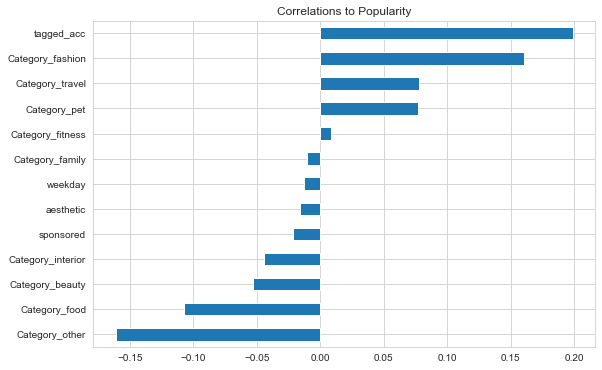

In [35]:
plt.figure(figsize=(9,6))

correlations = final_img.corr()['popularity'].drop('popularity')
correlations.sort_values().plot(kind='barh')

plt.title('Correlations to Popularity')
plt.show()

In [59]:

#Get helper function
#@title Helper functions {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

# Helper functions
def split_data(data):
    
    X = data.drop('popularity', axis=1)
    y = data['popularity']

    # Train-Test slpit of 70%-30%
    X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, stratify=y, random_state=102)

    return (X_train, X_test, y_train, y_test)

def base_learners_evaluations(data):
    X_train, X_test, y_train, y_test = split_data(data)
    
    idx = []
    scores = {'F1 score': [], 'Recall':[]}
    for bc in base_classifiers:
        lr = bc[1]
        lr.fit(X_train, y_train)

        predictions = lr.predict(X_test)

        idx.append(bc[0])
        scores['F1 score'].append(metrics.f1_score(y_test, predictions))
        scores['Recall'].append(metrics.recall_score(y_test, predictions))

    return pd.DataFrame(data=scores, index=idx)

def ensemble_evaluation(data, model, label='Original'):
    X_train, X_test, y_train, y_test = split_data(data)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)       
    return pd.DataFrame({'F1 Score': [metrics.f1_score(y_test, predictions)],
                         'Recall': [metrics.recall_score(y_test, predictions)],
                         'Precision': [metrics.precision_score(y_test, predictions)]}
                        ,index=[label])
    
def plot_models_comparison(title='F1 Score'):
    labels = models_comparison.keys()
    original_data = [models_comparison[model][title]['Original'] for model in labels]
    filtered_data = [models_comparison[model][title]['Filtered'] for model in labels]

    best_score_each_model = [max(original_data[i], filtered_data[i]) for i in range(len(original_data))]
    labels = [x for _, x in sorted(zip(best_score_each_model, labels), key=lambda pair: pair[0])]
    original_data = [x for _, x in sorted(zip(best_score_each_model, original_data), key=lambda pair: pair[0])]
    filtered_data = [x for _, x in sorted(zip(best_score_each_model, filtered_data), key=lambda pair: pair[0])]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(8,8))
    rects1 = ax.bar(x - width/2, original_data, width, label='Original Data')
    rects2 = ax.bar(x + width/2, filtered_data, width, label='Filtered Data')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{0:.3f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()



In [67]:
%%time
from sklearn.ensemble import RandomForestClassifier

ensemble = RandomForestClassifier(n_estimators=100, 
                                  criterion="entropy", 
                                  max_depth =10,
                                  min_samples_leaf =4,
                                  max_features = 'sqrt',
                                  n_jobs=-1)

ensemble_data = ensemble_evaluation(final_img, ensemble, label='Original')


CPU times: user 196 ms, sys: 51.4 ms, total: 248 ms
Wall time: 368 ms


In [68]:
print(ensemble_data)

          F1 Score    Recall  Precision
Original  0.671875  0.741379   0.614286


In [69]:
ensemble.feature_importances_

array([0.01957994, 0.02523261, 0.08446961, 0.01054809, 0.03969058,
       0.01530515, 0.09773808, 0.02420152, 0.03872243, 0.11290852,
       0.21555838, 0.        , 0.31604508])

In [61]:
print(ensemble_data)

          F1 Score   Recall  Precision
Original  0.628415  0.66092   0.598958


In [39]:
ensemble.feature_importances_

array([0.02031221, 0.02227218, 0.03756349, 0.01621595, 0.02738495,
       0.01733722, 0.04775505, 0.02167992, 0.0265142 , 0.19231989,
       0.11320125, 0.00358557, 0.4538581 ])

In [40]:
final_img


,Category_beauty,Category_family,Category_fashion,Category_fitness,Category_food,Category_interior,Category_other,Category_pet,Category_travel,aesthetic,tagged_acc,sponsored,popularity,weekday
0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,1,0,0,2,1,0,0,6
2,0,0,1,0,0,0,0,0,0,1,1,0,1,3
3,1,0,0,0,0,0,0,0,0,1,1,0,0,1
4,0,0,0,0,1,0,0,0,0,1,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,0,0,0,0,0,0,0,0,1,1,1,0,1,3
1073,0,0,1,0,0,0,0,0,0,2,1,0,1,5
1074,0,0,0,0,0,0,0,0,1,2,1,0,0,2
1075,0,0,0,0,0,1,0,0,0,1,0,0,1,6


In [41]:
b = final_img.drop(['popularity'],axis=1)
a = pd.DataFrame(ensemble.feature_importances_,b.columns,columns =['Importance'])
a.sort_values(by = ['Importance'],ascending = False)


,Importance
weekday,0.453858
aesthetic,0.192320
tagged_acc,0.113201
Category_other,0.047755
Category_fashion,0.037563
Category_food,0.027385
Category_travel,0.026514
Category_family,0.022272
Category_pet,0.021680
Category_beauty,0.020312


In [45]:
from sklearn.model_selection import RandomizedSearchCV


In [46]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [47]:
print(random_grid)

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [49]:
from sklearn.ensemble import RandomForestRegressor


In [55]:
final_img['popularity']

0       1
1       0
2       1
3       0
4       0
       ..
1072    1
1073    1
1074    0
1075    1
1076    1
Name: popularity, Length: 1077, dtype: int64

In [56]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(b,final_img['popularity'])


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   random_state=42, verbose=2)

In [57]:
rf_random.best_params_


{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [63]:
best_random_model = rf_random.best_estimator_
best_random_model.fit(b,final_img['popularity'])

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4)

In [65]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [71]:
ensemble = RandomForestClassifier(n_estimators=100, 
                                  criterion="entropy", 
                                  max_depth =10,
                                  min_samples_leaf =4,
                                  max_features = 'sqrt',
                                  n_jobs=-1)

ensemble_data = ensemble_evaluation(final_img, ensemble, label='Original')

In [72]:
print(ensemble_data)

          F1 Score    Recall  Precision
Original  0.670103  0.747126   0.607477


In [74]:
import pickle

In [76]:
file_name = 'rf_model.sav'
pickle.dump(ensemble, open(file_name, 'wb'))

In [ ]:
#False Negative => afraid post wrong post => Recall higher => lower False Negative

In [70]:
import xgboost

ModuleNotFoundError: No module named 'xgboost'

In [30]:
%%time
from xgboost import XGBClassifier

ensemble = XGBClassifier()

ensemble_data = ensemble_evaluation(final_img, ensemble, label='Original')


[20:18:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 502 ms, sys: 30.9 ms, total: 533 ms
Wall time: 214 ms


In [31]:
print(ensemble_data)

          F1 Score    Recall
Original  0.619318  0.626437


In [32]:
ensemble.feature_importances_

array([0.05772219, 0.10433354, 0.11983518, 0.02544997, 0.07888091,
       0.0467462 , 0.07772977, 0.17373018, 0.07501465, 0.05676171,
       0.12800854, 0.        , 0.05578728], dtype=float32)